In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite


--2023-06-18 17:53:16--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite.1’

m4_survey_data.sqli 100%[===================>]  34.98M  38.0MB/s    in 0.9s    

2023-06-18 17:53:18 (38.0 MB/s) - ‘m4_survey_data.sqlite.1’ saved [36679680/36679680]



In [2]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

In [3]:
import pandas as pd


In [4]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


array([[<AxesSubplot:title={'center':'ConvertedComp'}>]], dtype=object)

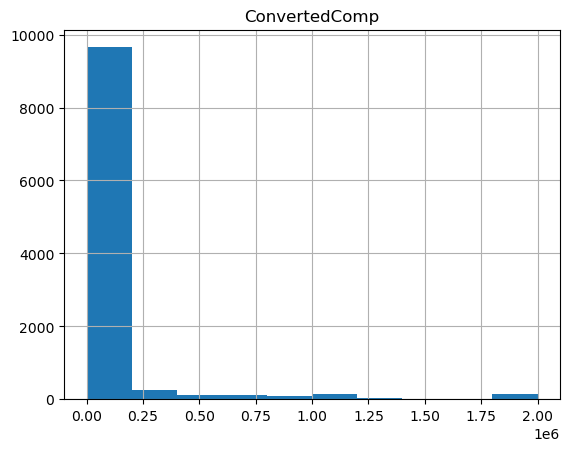

In [5]:
QUERY = """
SELECT ConvertedComp
FROM master
"""
df = pd.read_sql_query(QUERY,conn)


df.hist(bins=10)

<AxesSubplot:>

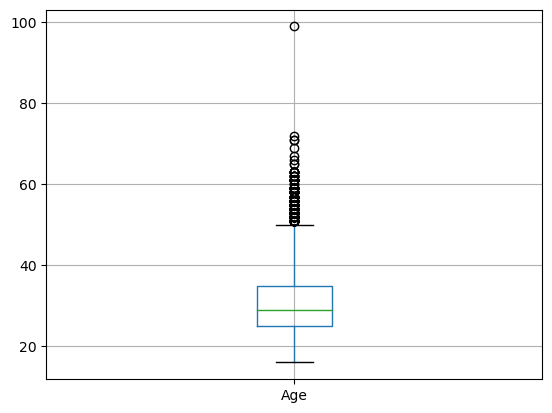

In [6]:
# your code goes here

QUERY = """
SELECT Age
FROM master
"""
df1 = pd.read_sql_query(QUERY,conn)

df1.boxplot()

<AxesSubplot:xlabel='Age', ylabel='WorkWeekHrs'>

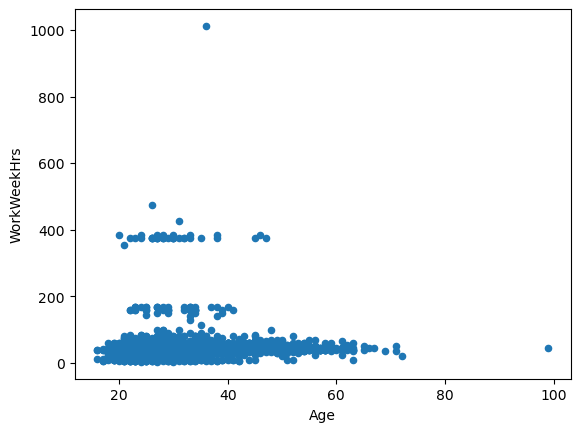

In [7]:
QUERY = """
SELECT Age, WorkWeekHrs
FROM master
"""
df2 = pd.read_sql_query(QUERY,conn)

df2.plot.scatter(x = 'Age', y = 'WorkWeekHrs')

<AxesSubplot:xlabel='CodeRevHrs', ylabel='WorkWeekHrs'>

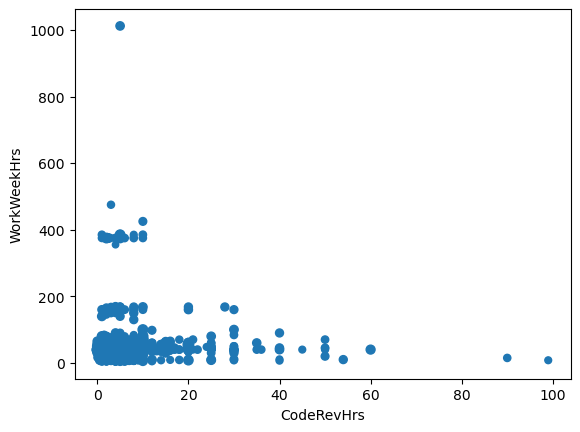

In [11]:
QUERY = """
SELECT Age, WorkWeekHrs, CodeRevHrs
FROM master
"""
df3 = pd.read_sql_query(QUERY,conn)
df3 = df3.dropna()

df3.plot.scatter(x = 'CodeRevHrs', y = 'WorkWeekHrs', s = 'Age' )

In [12]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.5.3


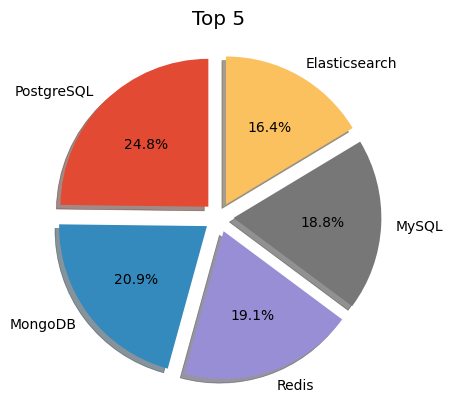

In [16]:
QUERY = """

select count(DatabaseDesireNextYear) 
as Count,DatabaseDesireNextYear 
from DatabaseDesireNextYear 
group by DatabaseDesireNextYear 
order by count(DatabaseDesireNextYear) DESC LIMIT 5

"""
df4 = pd.read_sql_query(QUERY,conn)
plt.pie(sizes, labels = lab , startangle=90,shadow=True,autopct='%1.1f%%', explode=explode_list)
plt.title('Top 5')
plt.show()

<AxesSubplot:xlabel='Age'>

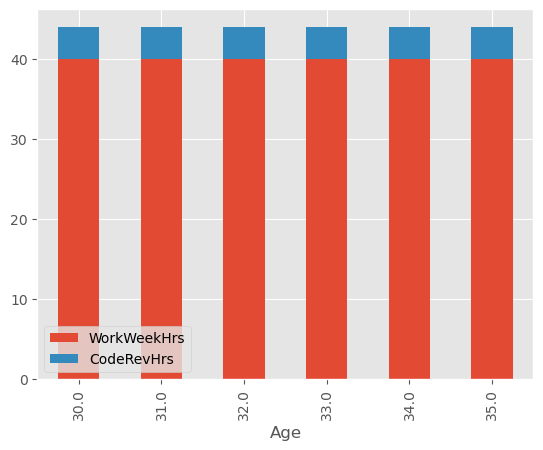

In [25]:
QUERY = """
SELECT Age, WorkWeekHrs, CodeRevHrs
FROM master
WHERE Age between 30 and 35
"""
df5 = pd.read_sql_query(QUERY,conn)
df5n = df5.groupby(['Age'])[['WorkWeekHrs','CodeRevHrs']].median()
df5n.plot(kind = 'bar', stacked = True )

<AxesSubplot:xlabel='Age'>

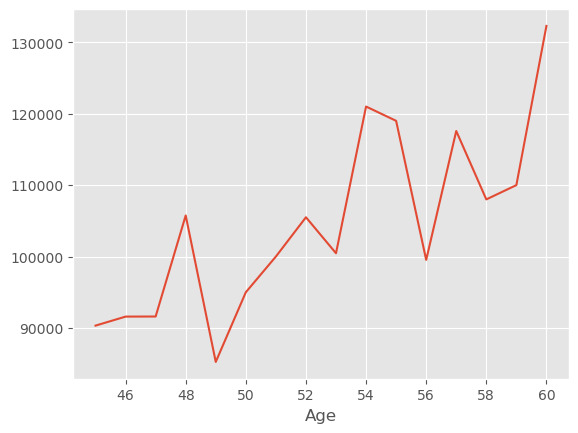

In [27]:
QUERY = """
SELECT Age, ConvertedComp
FROM master
Where Age between 45 and 60
"""

df9 = pd.read_sql_query(QUERY,conn)
df9 = df9.groupby(by='Age')['ConvertedComp'].median()
df9.plot()

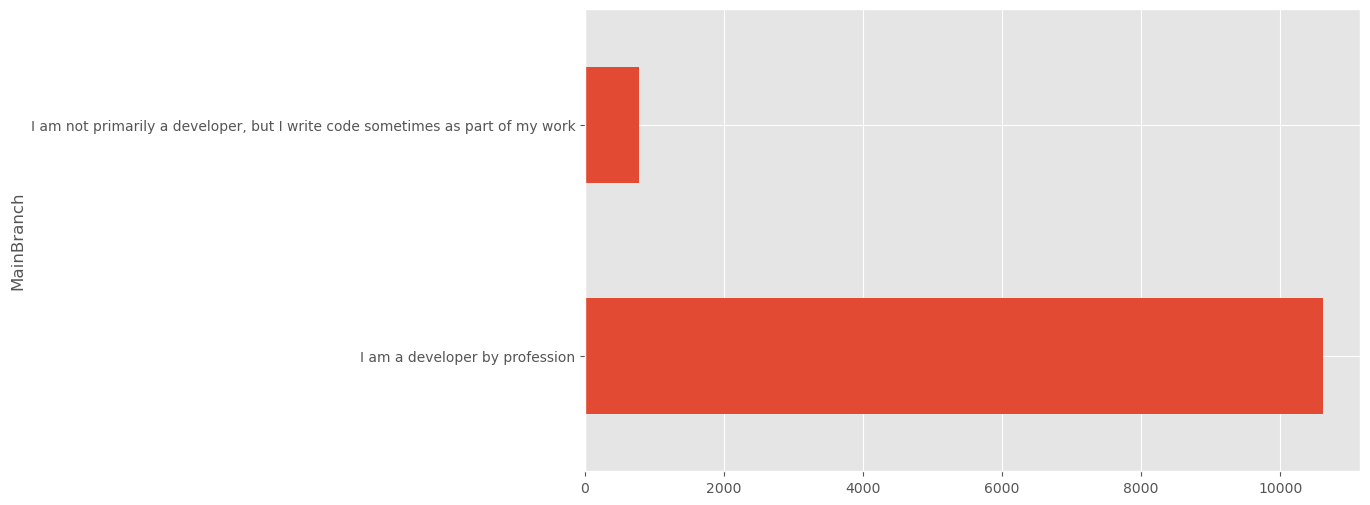

In [28]:
QUERY = """
SELECT MainBranch
FROM master

"""

df10 = pd.read_sql_query(QUERY,conn)
df11 = df10.groupby('MainBranch')['MainBranch'].count()
df11.plot(kind='barh', figsize=(10, 6))

plt.show()

In [29]:
conn.close()
